# Machine Learning IPN - Trabajo 22 marzo 2021
## Rodolfo Martínez Vega

In [65]:
import pandas as pd
import numpy as np

# from https://archive.ics.uci.edu/ml/datasets/iris
data = pd.read_csv("datasets/iris.data", header=None, names=["SL", "SW", "PL", "PW", "C"])

data = data.sample(len(data))

data["C1"] = data["C"].map(lambda c: 1 if c == "Iris-setosa" else 0)
data["C2"] = data["C"].map(lambda c: 1 if c == "Iris-versicolor" else 0)
data["C3"] = data["C"].map(lambda c: 1 if c == "Iris-virginica" else 0)

x1 = np.array(data["SL"])
x2 = np.array(data["SW"])
x3 = np.array(data["PL"])
x4 = np.array(data["PW"])

y1 = np.array(data["C1"])
y2 = np.array(data["C2"])
y3 = np.array(data["C3"])

X = np.array([
    x1,
    x2,
    x3,
    x4
]).T

Y = np.array([
    y1,
    y2,
    y3
]).T

## 1. Parte el conjunto de muestras `X` en `X_train` con 120 muestras y `X_test` con las muestras restantes.

In [66]:
X_train = X[:120]

X_test = X[120:]

## 2. Parte el conjunto de clases codificadas `Y` en `Y_train` con 120 clases y `Y_test` con las clases restantes.


In [67]:
Y_train = Y[:120]

Y_test = Y[120:]

## 3. Crea un clasificador por árbol de decisión con `sklearn.tree.DesicionTreeClassifier` usando `X_train` y `Y_train`. Pista: usa `clf.fit(X_train, Y_train)`.

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)

DecisionTreeClassifier()

## 4. Muestra el score para `X_test` y `Y_test`. Pista: usa `clf.score(X_test, Y_test)`.


In [69]:
clf.score(X_test, Y_test)

0.9666666666666667

## 5. Pinta el árbol de decisión usando `sklearn.tree.plot_tree(clf)`.


[Text(103.01538461538462, 199.32, 'X[2] <= 2.6\ngini = 0.444\nsamples = 120\nvalue = [[80, 40]\n[79, 41]\n[81, 39]]'),
 Text(77.26153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]\n[40, 0]]'),
 Text(128.76923076923077, 163.07999999999998, 'X[2] <= 4.75\ngini = 0.333\nsamples = 80\nvalue = [[80, 0]\n[39, 41]\n[41, 39]]'),
 Text(51.50769230769231, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.034\nsamples = 38\nvalue = [[38, 0]\n[1, 37]\n[37, 1]]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [[37, 0]\n[0, 37]\n[37, 0]]'),
 Text(77.26153846153846, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.115\nsamples = 42\nvalue = [[42, 0]\n[38, 4]\n[4, 38]]'),
 Text(128.76923076923077, 90.6, 'X[2] <= 4.95\ngini = 0.333\nsamples = 6\nvalue = [[6, 0]\n[3, 3]\n[3, 3]]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [[2,

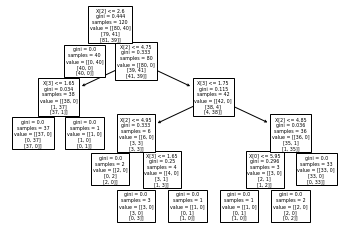

In [70]:
from sklearn.tree import plot_tree

plot_tree(clf)

## 6. Predice cuál es la clase de las siguientes muestras:

```py
[
    [6.7, 3. , 5. , 1.7],
    [5.5, 2.6, 4.4, 1.2],
    [4.5, 2.3, 1.3, 0.3],
    [4.6, 3.1, 1.5, 0.2],
]
```

In [71]:
def get_clase(clase_array):
    if np.array_equal(clase_array, [[1, 0, 0]]):
        return "Iris-setosa"
    elif np.array_equal(clase_array, [[0, 1, 0]]):
        return "Iris-versicolor"
    elif np.array_equal(clase_array, [[0, 0, 1]]):
        return "Iris-virginica"
    else:
        return "Clase desconocida"

muestra = [6.7, 3. , 5. , 1.7]
clase_predict = clf.predict([muestra])

print("La muestra con valor: {} es de tipo: {}, es decir, es: {}".format(muestra, clase_predict, get_clase(clase_predict)))

muestra = [5.5, 2.6, 4.4, 1.2]
clase_predict = clf.predict([muestra])

print("La muestra con valor: {} es de tipo: {}, es decir, es: {}".format(muestra, clase_predict, get_clase(clase_predict)))

muestra = [4.5, 2.3, 1.3, 0.3]
clase_predict = clf.predict([muestra])

print("La muestra con valor: {} es de tipo: {}, es decir, es: {}".format(muestra, clase_predict, get_clase(clase_predict)))

muestra = [4.6, 3.1, 1.5, 0.2]
clase_predict = clf.predict([muestra])

print("La muestra con valor: {} es de tipo: {}, es decir, es: {}".format(muestra, clase_predict, get_clase(clase_predict)))

La muestra con valor: [6.7, 3.0, 5.0, 1.7] es de tipo: [[0 1 0]], es decir, es: Iris-versicolor
La muestra con valor: [5.5, 2.6, 4.4, 1.2] es de tipo: [[0 1 0]], es decir, es: Iris-versicolor
La muestra con valor: [4.5, 2.3, 1.3, 0.3] es de tipo: [[1 0 0]], es decir, es: Iris-setosa
La muestra con valor: [4.6, 3.1, 1.5, 0.2] es de tipo: [[1 0 0]], es decir, es: Iris-setosa
